# Identify Fraud From Enron Data
###  Bhushan Pagare
___

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. Here, I build a supervised learning algorithm to identify fraudulent employees using Enron dataset.

## Introduction

The Enron fraud is the largest case of corporate fraud in American history. Founded in 1985, Enron Corporation went bankrupt by end of 2001 due to widespread corporate fraud and corruption. Before its fall, Fortune magazine had named Enron "America's most innovative company" for six consecutive years. So what happened? Who were the culprits?

In this project, I will play detective and build a classification algorithm to predict a person of interest identifier (POI) based on email and financial features in the combined dataset. A POI is anyone who has been indicted, settled without admitting the guilt and testified in exchange for immunity. We will check our predicted POI against actual POI 
in the dataset to evaluate our prediction.


In [131]:
### Importing Common Modules needed for project
from time import time   # For calculating training time
import pandas as pd    # Pandas is used for handling dataFrames
import pickle      # Pickle is used to load .pkl dataset files
import matplotlib.pyplot as plt    # Pyplot is used for visualizing the information
from sklearn.feature_selection import SelectKBest, f_classif    # For Selecting K-Best features of availabel ones
from sklearn.model_selection import train_test_split, GridSearchCV   # train_test_split for splitting up data
                                                                     # into train and test
                                                                     # GridSearchCV for finding best parameters tuned
from sklearn.model_selection import StratifiedShuffleSplit   # For Cross-Validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # For evaluating different algorithms
import numpy as np     # Numpy is used to manipulate data operations,
                       # Most of the sklearn libraries expects numpy ndarrays as its default arguments
    
### Importing Models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [132]:
### Load the dictionary containing the dataset
enron_data = pd.read_csv('train_data.csv')
enron_data_test = pd.read_csv('test_features.csv')

enron_data_name =enron_data_test['name']

In [133]:
enron_data.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


Here 'POI' column is the labels column which determines whether the person is of interest or not!

In [134]:
### Getting slight information about that DataFrame
print("There are total of {} people in the dataset".format(len(enron_data.index)))
print("Out of which {} are POI".format(enron_data['poi'].value_counts()[True]))

There are total of 113 people in the dataset
Out of which 13 are POI


In [135]:
### Describing the DataFrame
enron_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bonus,61.0,1.147436e+06,1.505189e+06,70000.0,450000.00,750000.0,1000000.00,8000000.0
deferral_payments,28.0,6.344374e+05,8.603646e+05,-102500.0,76567.50,195190.0,834205.25,2964506.0
deferred_income,34.0,-4.625664e+05,8.095392e+05,-3504386.0,-552703.25,-117534.0,-27083.25,-1042.0
director_fees,13.0,8.939785e+04,4.114339e+04,3285.0,101250.00,108579.0,112492.00,125034.0
exercised_stock_options,81.0,2.985081e+06,6.004174e+06,3285.0,400478.00,850010.0,2165172.00,34348384.0
expenses,73.0,5.104055e+04,4.759668e+04,148.0,18834.00,41953.0,59175.00,228763.0
from_messages,65.0,7.113231e+02,2.074498e+03,12.0,19.00,45.0,215.00,14368.0
from_poi_to_this_person,65.0,6.480000e+01,9.186321e+01,0.0,10.00,28.0,88.00,528.0
from_this_person_to_poi,65.0,4.009231e+01,8.890141e+01,0.0,0.00,7.0,27.00,411.0
loan_advances,2.0,4.096250e+07,5.736404e+07,400000.0,20681250.00,40962500.0,61243750.00,81525000.0


In [136]:
### Replacing the missing values with 0
from sklearn.preprocessing import Imputer

#enron_data.fillna(0, inplace=True)
#enron_data.replace(to_replace='NaN', value=0.0, inplace=True)

#enron_data_test.fillna(0, inplace=True)
#enron_data_test.replace(to_replace='NaN', value=0.0, inplace=True)

fl = ['bonus','deferral_payments','deferred_income','director_fees','exercised_stock_options','expenses','from_messages','from_poi_to_this_person','from_this_person_to_poi','loan_advances','long_term_incentive','other','restricted_stock','restricted_stock_deferred','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'
]


imp = Imputer(missing_values='NaN', strategy='mean', axis=0)  # 建立替换规则：将值为Nan的缺失值以均值做替换


#enron_data=enron_data.drop(['name','email_address'], axis=1)
#enron_data_test=enron_data_test.drop(['name','email_address'], axis=1)







C:\Users\sky\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [137]:
imp.fit(enron_data[fl]) 
enron_data[fl] = imp.transform(enron_data[fl])
print(enron_data[fl])


imp.fit(enron_data_test[fl]) 
enron_data_test[fl] = imp.transform(enron_data_test[fl])  # 应用模型规则
print(enron_data_test[fl])

enron_data
enron_data_test

            bonus  deferral_payments  deferred_income  director_fees  \
0    1.750000e+06       6.344374e+05    -3.504386e+06   89397.846154   
1    5.600000e+06       6.344374e+05    -4.625664e+05   89397.846154   
2    2.000000e+05       6.344374e+05    -4.167000e+03   89397.846154   
3    8.000000e+05       6.344374e+05    -4.625664e+05   89397.846154   
4    1.250000e+06       6.344374e+05    -2.625000e+05   89397.846154   
5    1.147436e+06       1.025900e+04    -4.625664e+05   89397.846154   
6    1.147436e+06       6.344374e+05    -4.625664e+05   89397.846154   
7    1.200000e+06       2.761000e+04    -1.440620e+05   89397.846154   
8    7.000000e+06       2.029110e+05    -3.000000e+05   89397.846154   
9    6.000000e+05       6.344374e+05    -4.625664e+05   89397.846154   
10   7.000000e+05       6.344374e+05    -4.625664e+05   89397.846154   
11   7.000000e+05       2.146780e+05    -1.000000e+05   89397.846154   
12   1.300000e+06       6.344374e+05    -1.386055e+06   89397.84

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5.249999e+06,2.144013e+06,-2334434.0,418377.75,tim.belden@enron.com,9.531360e+05,1.735500e+04,484.000000,228.000000,...,42962500.0,3.423860e+06,2.106980e+05,1.575690e+05,6.517809e+05,2.139990e+05,5521.000000,7991.000000,5.501630e+06,1.110705e+06
1,BOWEN JR RAYMOND M,1.350000e+06,4.209095e+06,-833.0,418377.75,raymond.bowen@enron.com,1.756609e+07,6.590700e+04,27.000000,140.000000,...,42962500.0,9.742930e+05,1.621000e+03,2.520550e+05,6.517809e+05,2.786010e+05,1593.000000,1858.000000,2.669589e+06,2.520550e+05
2,HANNON KEVIN P,1.500000e+06,4.209095e+06,-3117011.0,418377.75,kevin.hannon@enron.com,5.538001e+06,3.403900e+04,32.000000,32.000000,...,42962500.0,1.617011e+06,1.135000e+04,8.530640e+05,6.517809e+05,2.432930e+05,1035.000000,1045.000000,2.886820e+05,6.391065e+06
3,DELAINEY DAVID W,3.000000e+06,4.209095e+06,-2677068.4,418377.75,david.delainey@enron.com,2.291113e+06,8.617400e+04,3069.000000,66.000000,...,42962500.0,1.294981e+06,1.661000e+03,1.323148e+06,6.517809e+05,3.651630e+05,2097.000000,3093.000000,4.747979e+06,3.614261e+06
4,CAUSEY RICHARD A,1.000000e+06,4.209095e+06,-235000.0,418377.75,richard.causey@enron.com,1.756609e+07,3.067400e+04,49.000000,58.000000,...,42962500.0,3.500000e+05,3.078950e+05,2.502063e+06,6.517809e+05,4.151890e+05,1585.000000,1892.000000,1.868758e+06,2.502063e+06
5,HICKERSON GARY J,1.700000e+06,4.209095e+06,-2677068.4,418377.75,gary.hickerson@enron.com,1.756609e+07,9.884900e+04,27.000000,40.000000,...,42962500.0,6.922300e+04,1.936000e+03,4.410960e+05,6.517809e+05,2.117880e+05,900.000000,1320.000000,2.081796e+06,4.410960e+05
6,FREVERT MARK A,2.000000e+06,6.426990e+06,-3367011.0,418377.75,mark.frevert@enron.com,1.043352e+07,8.698700e+04,21.000000,242.000000,...,2000000.0,1.617011e+06,7.427621e+06,4.188667e+06,6.517809e+05,1.060932e+06,2979.000000,3275.000000,1.725253e+07,1.462218e+07
7,CHAN RONNIE,5.937791e+06,4.209095e+06,-98784.0,98784.00,NaN,1.756609e+07,3.001494e+05,291.428571,65.190476,...,42962500.0,3.423860e+06,2.275742e+06,3.246000e+04,-3.246000e+04,1.518799e+06,1377.952381,1819.428571,1.332610e+07,1.813783e+07
8,DONAHUE JR JEFFREY M,8.000000e+05,4.209095e+06,-300000.0,418377.75,jeff.donahue@enron.com,7.659200e+05,9.626800e+04,22.000000,188.000000,...,42962500.0,3.423860e+06,8.910000e+02,3.150680e+05,6.517809e+05,2.786010e+05,772.000000,865.000000,8.757600e+05,1.080988e+06
9,REYNOLDS LAWRENCE,1.000000e+05,5.136500e+04,-200000.0,418377.75,NaN,4.160672e+06,8.409000e+03,291.428571,65.190476,...,42962500.0,1.562500e+05,2.020520e+05,2.014830e+05,-1.402640e+05,7.639900e+04,1377.952381,1819.428571,3.944750e+05,4.221891e+06


## Outlier Detection

Visualization is one of the most powerful tools for finding outliers. Upon plotting salary against bonus, there is an outlier that pops out immediately - "TOTAL" (move the cursor and examine the points in scatterplot). The spreadsheet added up all the data points for us and we need to take that point out. Upon closer examination, I found one more entry which is not the name of a real person "THE TRAVEL AGENCY IN THE PARK". The entry is dropped from the dataset. The entries which have all the features as 'NaN' are also dropped from the dataset.

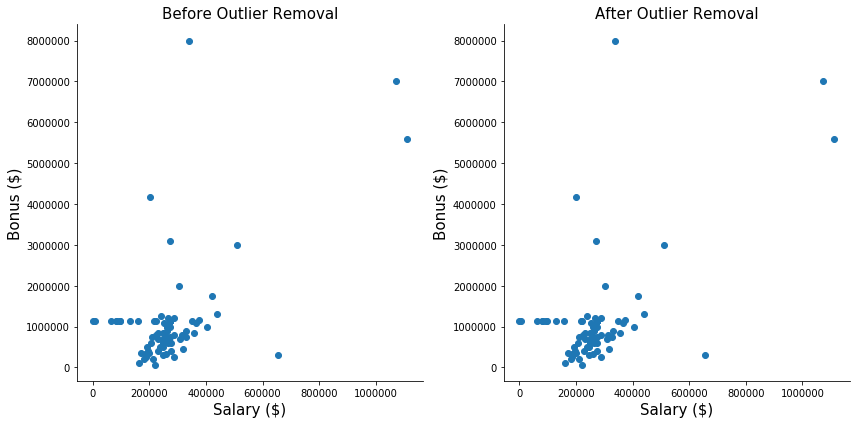

In [138]:
### Visualizing Salary v/s Balance Graphs for outlier identification
figure, (axes1, axes2) = plt.subplots(ncols=2, figsize=(12, 6))

axes1.scatter(enron_data.salary, enron_data.bonus)
axes1.set_xlabel("Salary ($)", fontsize=15)
axes1.set_ylabel("Bonus ($)", fontsize=15)
axes1.set_title("Before Outlier Removal", fontsize=15)
axes1.spines['right'].set_visible(False)
axes1.spines['top'].set_visible(False)

# Dropping the outliers
#enron_data.drop(['TOTAL'], axis = 0, inplace=True)
#enron_data.drop(['THE TRAVEL AGENCY IN THE PARK'], axis = 0, inplace= True)

axes2.scatter(enron_data.salary, enron_data.bonus)
axes2.set_xlabel("Salary ($)", fontsize=15)
axes2.set_ylabel("Bonus ($)", fontsize=15)
axes2.set_title("After Outlier Removal", fontsize=15)
axes2.spines['right'].set_visible(False)
axes2.spines['top'].set_visible(False)

figure.tight_layout()
plt.show()

## Feature Engineering

Feature engineering involves using human intuition to hypothesize what feature might contain pattern that can be exploited using machine learning, coding up the new feature, visualizing and repeating the same process again. Our hypothesis here - "POI's sent email to each other at a rate higher than for Non-POI's." I coded up two new features fraction of emails this person gets from poi (fraction_from_poi) and fraction of emails this person send to poi (fraction_to_poi). number of emails from this person to POI/total number of message from this person

$$ fraction\_from\_poi = \frac{number\ of\ emails\ from\ POI\ to\ this\ person}{total\ number\ of\ messages\ to\ this\  person} = \frac{from\_poi\_to\_this\_person}{to\_messages} $$

$$ fraction\_to\_poi = \frac{number\ of\ emails\ from\ this\ person\ to\ POI}{total\ number\ of\ messages\ from\ this\ person} = \frac{from\_this\_person\_to\_poi}{from\_messages} $$

When I visualize these new features, we can see that these new features provide discriminating power between POI and Non-POI. There is a good amount of feature space in the lower part of plot (on right) below 0.2 where there are no POIs.

In [139]:
### Creating new features fraction_from_poi and fraction_to_poi

from sklearn.preprocessing import MinMaxScaler


enron_data["fraction_from_poi"] = enron_data["from_poi_to_this_person"].\
                                  divide(enron_data["to_messages"], fill_value=0.0) 

enron_data["fraction_to_poi"] = enron_data["from_this_person_to_poi"].\
                                divide(enron_data["from_messages"], fill_value=0.0)
enron_data['shared_receipt_poi_ratio'] = enron_data['shared_receipt_with_poi'].\
                                 divide(enron_data['to_messages'], fill_value=0.0)

enron_data['bonus_to_salary'] = enron_data['bonus'].divide(enron_data['salary'], fill_value=0.0)
enron_data['bonus_to_total'] = enron_data['bonus'].divide(enron_data['total_payments'], fill_value=0.0)

enron_data["fraction_from_poi"] = enron_data["fraction_from_poi"].fillna(0.0)
enron_data["fraction_to_poi"] = enron_data["fraction_to_poi"].fillna(0.0)
enron_data["shared_receipt_poi_ratio"] = enron_data["shared_receipt_poi_ratio"].fillna(0.0)
enron_data["bonus_to_salary"] = enron_data["bonus_to_salary"].fillna(0.0)
enron_data["bonus_to_total"] = enron_data["bonus_to_total"].fillna(0.0)

import math
def func(a,b):
    if  math.isnan(b) or b==0:
        return a
    else:
        return a/b
        
enron_data['email_benefit_ratio']=enron_data.apply(lambda x: func(x.exercised_stock_options, x.from_poi_to_this_person), axis = 1)

scaler = MinMaxScaler()
enron_data['e_sta'] = scaler.fit_transform(enron_data[['exercised_stock_options']])
enron_data['f_sta'] = scaler.fit_transform(enron_data[['from_poi_to_this_person']])
enron_data['a_sta'] = (1+enron_data['e_sta'])*(1+enron_data['f_sta'])
print(enron_data[['email_benefit_ratio','e_sta','f_sta','a_sta','poi']])


enron_data_test["fraction_from_poi"] = enron_data_test["from_poi_to_this_person"].\
                                  divide(enron_data_test["to_messages"], fill_value=0.0) 

enron_data_test["fraction_to_poi"] = enron_data_test["from_this_person_to_poi"].\
                                divide(enron_data_test["from_messages"], fill_value=0.0)
enron_data_test['shared_receipt_poi_ratio'] = enron_data_test['shared_receipt_with_poi'].\
                                 divide(enron_data_test['to_messages'], fill_value=0.0)

enron_data_test['bonus_to_salary'] = enron_data_test['bonus'].divide(enron_data_test['salary'], fill_value=0.0)
enron_data_test['bonus_to_total'] = enron_data_test['bonus'].divide(enron_data_test['total_payments'], fill_value=0.0)

enron_data_test["fraction_from_poi"] = enron_data_test["fraction_from_poi"].fillna(0.0)
enron_data_test["fraction_to_poi"] = enron_data_test["fraction_to_poi"].fillna(0.0)
enron_data_test["shared_receipt_poi_ratio"] = enron_data_test["shared_receipt_poi_ratio"].fillna(0.0)
enron_data_test["bonus_to_salary"] = enron_data_test["bonus_to_salary"].fillna(0.0)
enron_data_test["bonus_to_total"] = enron_data_test["bonus_to_total"].fillna(0.0)


enron_data_test['email_benefit_ratio']=enron_data_test.apply(lambda x: func(x.exercised_stock_options, x.from_poi_to_this_person), axis = 1)
scaler = MinMaxScaler()
enron_data_test['e_sta'] = scaler.fit_transform(enron_data_test[['exercised_stock_options']])
enron_data_test['f_sta'] = scaler.fit_transform(enron_data_test[['from_poi_to_this_person']])
enron_data_test['a_sta'] = (1+enron_data_test['e_sta'])*(1+enron_data_test['f_sta'])
#print(enron_data_test[['email_benefit_ratio','exercised_stock_options','from_poi_to_this_person','exercised_stock_options_sta','from_poi_to_this_person_sta']])



     email_benefit_ratio     e_sta     f_sta     a_sta    poi
0           4.712899e+05  0.576236  0.079545  1.701619   True
1           2.187500e+05  0.560392  0.166667  1.820457   True
2           1.249535e+05  0.047201  0.024621  1.072984   True
3           4.606606e+04  0.086819  0.122727  1.220201   True
4           1.500041e+04  0.086819  0.376894  1.496434   True
5           4.747849e+05  0.895696  0.122727  2.128350   True
6           1.282184e+05  0.241818  0.122727  1.394223   True
7           1.243784e+04  0.086819  0.454545  1.580827   True
8           2.792552e+05  1.000000  0.232955  2.465909   True
9           7.398615e+03  0.011106  0.098485  1.110685   True
10          1.267428e+04  0.019463  0.100379  1.121795   True
11          4.672109e+04  0.047516  0.066288  1.116954   True
12          4.606606e+04  0.086819  0.122727  1.220201   True
13          6.736343e+03  0.012614  0.122727  1.136889  False
14          3.679874e+04  0.050262  0.089015  1.143751  False
15      

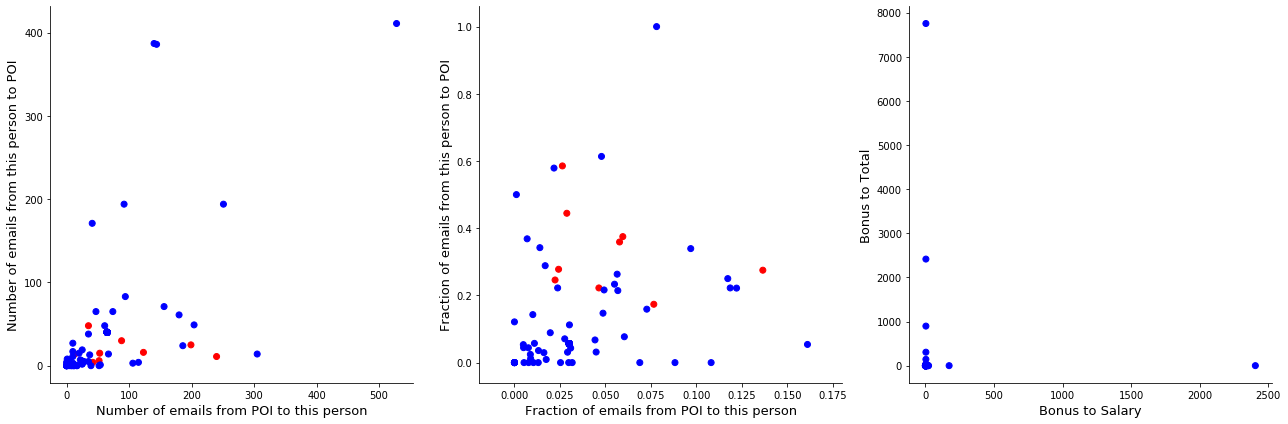

In [140]:
### Visualizing the effect of new features
figure, (axes1, axes2, axes3) = plt.subplots(nrows=1, ncols=3, figsize=(18,6))

# Color scheme for plots
colors = np.where(enron_data["poi"] == 1, 'r', 'o')
colors[enron_data["poi"] == 0] = 'b'

axes1.scatter(enron_data["from_poi_to_this_person"], enron_data["from_this_person_to_poi"], color=colors)
axes1.set_xlabel("Number of emails from POI to this person", fontsize=13)
axes1.set_ylabel("Number of emails from this person to POI", fontsize=13)
axes1.spines['right'].set_visible(False)
axes1.spines['top'].set_visible(False)

axes2.scatter(enron_data["fraction_from_poi"], enron_data["fraction_to_poi"], color=colors)
axes2.set_xlabel("Fraction of emails from POI to this person", fontsize=13)
axes2.set_ylabel("Fraction of emails from this person to POI", fontsize=13)
axes2.spines['right'].set_visible(False)
axes2.spines['top'].set_visible(False)

axes3.scatter(enron_data["bonus_to_salary"], enron_data["bonus_to_total"], color=colors)
axes3.set_xlabel("Bonus to Salary", fontsize=13)
axes3.set_ylabel("Bonus to Total", fontsize=13)
axes3.spines['right'].set_visible(False)
axes3.spines['top'].set_visible(False)

figure.tight_layout()
plt.show()

## Feature Scaling

I have used **Decision Tree** and **Naive Bayes** as my final algorithm. Algorithms like decision tree and linear regression don't require feature scaling, whereas Support Vector Machines (SVM) and k-means clustering does.

**SVM** and **K-Means** clustering calculate Euclidean distance between points. If one of the features has a large range, the distance will be governed by this particular feature. These classifiers are affine transformation variant.

In case of **Linear Regression**, there is a coefficient with each feature. If a feature has large ranges that do not effect the label, regression algorithm will make the corresponding coefficients small. Even in case of tree based algorithms, we don't have to worry about one dimension, when we are doing something with the other. These classifers are **affine transformation invariant**.

## Feature Selection

Features $≠$ Information. We want to have the minimum number of features than capture trends and patterns in our data. We want to get rid of features that don't give us any information. Machine learning algorithm is just going to be as good as the features we put into it. It is critical that the methodology deployed for feature selection must be scientific and exhaustive without room for intuition.

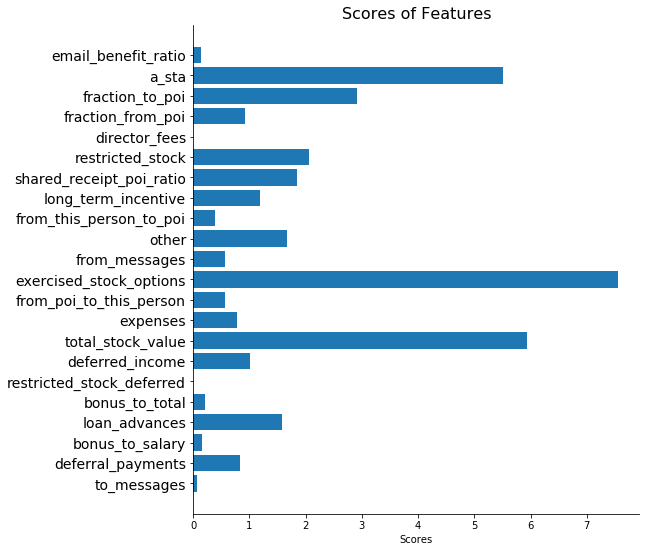

In [141]:
### Selecing the most important features for the given data

# Converting the boolean type of poi column to float values for classification
enron_data["poi"] = enron_data["poi"].astype(float)

features_list = ['to_messages', 'deferral_payments', 'bonus_to_salary',
                 'loan_advances', 'bonus_to_total', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses',
                 'from_poi_to_this_person', 'exercised_stock_options', 'from_messages',
                 'other', 'from_this_person_to_poi', 'long_term_incentive',
                 'shared_receipt_poi_ratio', 'restricted_stock', 'director_fees',
                 'fraction_from_poi', 'fraction_to_poi','a_sta','email_benefit_ratio']

ori_features_list=features_list

labels = enron_data["poi"].tolist()
features = enron_data[features_list].values.tolist()

# Performing feature selection
selector = SelectKBest(f_classif, k=19)
selector.fit(features, labels)

scores = -np.log10(selector.pvalues_)

# Plotting the features wrt scores
figure, axes = plt.subplots(figsize=(8,9))
axes.barh(features_list, width=scores)
axes.set_yticklabels(features_list, fontsize=14)
axes.set_xlabel("Scores")
axes.set_title("Scores of Features", fontsize=16)
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.show()

In [142]:
### Updated Features

# Selecting all the features with score > 2
updated_features_list = ["bonus_to_total", "loan_advances", "bonus_to_salary", "deferred_income",
                         "total_stock_value", "exercised_stock_options", "long_term_incentive",
                         "shared_receipt_poi_ratio", "restricted_stock", "fraction_to_poi","a_sta",'email_benefit_ratio']

#labels = enron_data["poi"].tolist()
#features = enron_data[updated_features_list].values.tolist()


labels = enron_data["poi"].tolist()
features = enron_data[features_list].values.tolist()

## Pick up an Algorithm

Different algorithms were attempted using the above mentioned feature list.
I tried **Decision Tree Classifier**, **Random Forest Classifier**, **Ada Boost Classifier**, **Gaussian Naive Bayes**, **K-Nearest Neighbors**

In [143]:
# Splitting up the data

#features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=67)


#features_train=enron_data[updated_features_list].values.tolist()
#labels_train=enron_data["poi"].tolist()
#features_test=enron_data_test[updated_features_list].values.tolist()



features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=67)
print(labels_test)
print(labels_train)

[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


In [144]:
### Trying differnet algorithms
algorithms = []
accuracy = []
precision = []
recall = []
f1score = []

models = [("Decision Tree Classifier", DecisionTreeClassifier(random_state=42)),
          ("Gaussian Naive Bayes", GaussianNB()),
          ("Random Forest Classifier", RandomForestClassifier(random_state=42, n_estimators=100)),
          ("K Nearest Neighbors", KNeighborsClassifier()),
          ("Ada Boost Classifier", AdaBoostClassifier(random_state=42)),
          ("Logistic Regression", LogisticRegression())]

#print(features_test)
for name, model in models:
    clf = model
    clf.fit(features_train, labels_train)
    predicitons = clf.predict(features_test)
    algorithms.append(name)
    
    clf_score=clf.score(features_train,labels_train)
    print(name+str(clf_score))
    accuracy.append(accuracy_score(labels_test, predicitons))
    precision.append(precision_score(labels_test, predicitons))
    recall.append(recall_score(labels_test, predicitons))
    f1score.append(f1_score(labels_test, predicitons))

evaluation_matrix = {"Algorithm": algorithms, "Accuracy": accuracy,
              "Precision": precision, "Recall": recall,
              "F1-Score": f1score}
evaluation = pd.DataFrame(evaluation_matrix)
evaluation

Decision Tree Classifier1.0
Gaussian Naive Bayes0.45569620253164556
Random Forest Classifier1.0
K Nearest Neighbors0.9367088607594937
Ada Boost Classifier1.0
Logistic Regression1.0


C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Decision Tree Classifier,0.794118,0.600000,0.375,0.461538
1,Gaussian Naive Bayes,0.529412,0.277778,0.625,0.384615
2,Random Forest Classifier,0.823529,0.750000,0.375,0.500000
3,K Nearest Neighbors,0.764706,0.000000,0.000,0.000000
4,Ada Boost Classifier,0.794118,0.666667,0.250,0.363636
5,Logistic Regression,0.852941,0.714286,0.625,0.666667


## Hyperparameters Optimization

Parameter tuning for an algorithm means selecting the good and robust parameter or set of parameters for an algorithm to optimize its performance. Default parameters may not be customized very well for the particular dataset features and might result in poor performance. Scikit learn provides two methods for algorithm parameter tuning/Hyperparameter optimization- GridSearchCV and RandomizedSearchCV.

I used **GridSearchCV** to do exhaustive search over different parameters and find the best parameters.

1. I used the **'f1'** as my *"scoring"* parameter to guide the parameter search process to minimize False positives and False negatives.
2. In the **"cv"** parameter, I passed a *cross validation* object **StratifiedShuffleSplit** to validate my search results that best adapt to my dataset characteristics.
3. I am choosing Decision Tree Classifier as my final algorithm, lets tune it below

*max_depth* determines when the splitting of decision tree node stops. *min_samples_split* monitors the amount of observations in an internal node; if a certain threshold is not reached (e.g min 5 people) no further splitting can be done. Very deep trees fit to quirks in data and perform well on training data, but will perform worse on test (unseen) data. We want our model to generalize better.

## Validate and Evaluate



**Validation** is the strategy to evaluate the performance of the model on unseen data. A classic mistake is to evaluate the performance of an algorithm on the same dataset it was trained on. It will make our algorithm perform better than it actually does. However, we will have no idea how our algorithm performs on unseen data.

It is essential practice in data mining procedures to keep a subset of data as holdout data- test data. We train our model on training data and examine the *generalization performance* of the model on the test data. We hide the label for target variable of the test data from the model and let the model predict the values for target variable. Then we compare the values predicted by the model with the hidden true values. We can also use a more sophisticated holdout training and testing procedure called cross-validation.

In our case, I used a variation of *k-fold cross-validation* called **StratifiedShuffleSplit**. StratifiedShuffleSplit will make randomly chosen training and test sets multiple times and average the results over all the tests. Data is first shuffled and then split into a pair of training and test sets. Stratification ensures training and test splits have class distribution (POI:Non-POI) that represents the overall data. Stratification is well suited in our case because of class imbalance (18 POI vs 128 Non-POI).

There are a number of evaluation metrics for classification challenges. In **balanced classes**, where all the labels are equally represented, we look at the classification **accuracy** of the model.

$$ Accuracy = \frac{Number\ of\ labels\ predicted\ correctly}{Total\ number\ of\ predicitions} = \frac{True\ Positives\ +\ True\ Negatives}{Total\ Predictions} $$

However, accuracy is not ideal for **skewed classes**. In our case, number of POI are small compared to non-POI (18 vs 128). We can have high accuracy by classifying many non-POI correctly and still not have a POI classiifed correctly. For imbalanced classes like we have, **Precision** and **Recall** are common measures of model performance.

$$ Precision = \frac{True\ Positive}{True\ Positive\ +\ False\ Positive} $$

$$ Recall = \frac{True\ Positive}{True\ Positive\ +\ False\ Positive} $$

A **good precision** means that whenever a POI gets flagged in my test set, I know with a lot of confidence that it's very likely to be a real POI and not a false alarm. A low precision indicates a large number of False Positives, where non-POI gets flagged as POI.

A **good recall** means nearly I am able to identify a POI everytime it shows up in test cases. A low recall indicates many False Negatives, where POIs don't get flagged correctly

F1 score conveys a balance between precision and recall. It is the harmonic mean of precision and recall.

$$ F_{1}\ Score = \frac{2 \cdot precision\cdot recall}{precision+ recall} $$

A **good F1-score** means both my false positives and false negatives are low, I can identify my POI's reliably and accurately. If my classifier flags a POI then the person is almost certainly a POI, and if the classifier does not flag someone, then they are almost certainly not a POI.

### Final Algorithm Performance

In [151]:
t0 = time()

clf =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
# clf = DecisionTreeClassifier(random_state=42)

clf.fit(features_train, labels_train)



final_test=enron_data_test[features_list].values.tolist()
predicitons = clf.predict(final_test)


print(clf.predict_proba(final_test)[:,1])
print(predicitons)

clf_score=clf.score(features_train,labels_train)
print(clf_score)

sub = pd.DataFrame({'name': enron_data_name, 'poi': clf.predict_proba(final_test)[:,1]})

sub.to_csv('midterm.csv', index=False)


#accuracy.append((accuracy_score(labels_test, predicitons)))
#precision.append((precision_score(labels_test, predicitons)))
#recall.append((recall_score(labels_test, predicitons)))
#f1score.append((f1_score(labels_test, predicitons)))

#print("Accuracy:", round(accuracy_score(labels_test, predicitons), 3))
#print("Precision:", round(precision_score(labels_test, predicitons), 3))
#print("Recall:", round(recall_score(labels_test, predicitons), 3))
#print("F1-Score:", round(f1_score(labels_test, predicitons), 3))
#print("Done in", str(round(time()-t0, 3)) + "s")


[0.25925295 0.38244467 0.31199417 0.14132215 0.32314559 0.4187776
 0.62381169 0.50512592 0.2889035  0.04374869 0.32072262 0.35314392
 0.23768591 0.60228862 0.35519923 0.41015119 0.01033216 0.32021481
 0.37838668 0.22717566 0.72544099 0.17568194 0.42007332 0.70587389
 0.4322638  0.56014951 0.37814662 0.30973122 0.1298955  0.16510979
 0.28101627 0.13788772 0.21473353]
[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0.]
0.9620253164556962


In [152]:

t0 = time()

#clf =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                       max_depth=40, max_features='auto', max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=1, min_samples_split=6,
#                       min_weight_fraction_leaf=0.0, n_estimators=100,
#                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
#                       warm_start=False)


clf =RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)
# clf = DecisionTreeClassifier(random_state=42)

clf.fit(features_train, labels_train)
predicitons = clf.predict(features_test)

accuracy.append((accuracy_score(labels_test, predicitons)))
precision.append((precision_score(labels_test, predicitons)))
recall.append((recall_score(labels_test, predicitons)))
f1score.append((f1_score(labels_test, predicitons)))

print("Accuracy:", round(accuracy_score(labels_test, predicitons), 3))
print("Precision:", round(precision_score(labels_test, predicitons), 3))
print("Recall:", round(recall_score(labels_test, predicitons), 3))
print("F1-Score:", round(f1_score(labels_test, predicitons), 3))
print("Done in", str(round(time()-t0, 3)) + "s")





Accuracy: 0.824
Precision: 0.75
Recall: 0.375
F1-Score: 0.5
Done in 0.265s


In [150]:


### Tuning the Hyper-Parameters
clf_parameters = { 'criterion': ['gini', 'entropy'],
                   'max_depth': [None, 20,30,40,50,60],
                   'min_samples_split': [5, 10,15 ,20, 25,30, 40],
                   'n_estimators': [100],
                   'oob_score':[True,False],
                    'n_jobs':[-1]}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=67)
clf = GridSearchCV(RandomForestClassifier(), param_grid = clf_parameters, cv = cv, scoring = 'f1')
clf.fit(features,labels)




best_clf_parameters = clf.best_estimator_
best_clf_parameters

C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarn

C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarn

C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarn

C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarn

C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarn

C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarn

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

## Conclusion


The precision can be interpreted as the likelihood that a person who is identified as a POI is actually a true POI; the fact that this is 0.67 means that using this identifier to flag POI’s would result in 33% of the positive flags being false alarms. Recall measures how likely it is that identifier will flag a POI in the test set. 50% of the time it would catch that person, and 50% of the time it wouldn’t.
These numbers are quite good but we still can improve the strategy. One of the possible paths to improvement is digging in to the emails data more. The email features in the starter dataset were aggregated over all the messages for a given person. By digging into the text of each individual’s messages, it’s possible that more detailed patterns (say, messages to/from a specific address, rather than just messages to/from any POI address, or the usage of specific vocabulary terms) might emerge. Since we live in a world in which more POI finance data might not be easy to find, the next realistic thing to try might be to extract more data from the emails.

### References

1. [Enron Wiki](https://en.wikipedia.org/wiki/Enron)
2. [Scikit-learn](https://scikit-learn.org/stable/)
3. [Stackoverflow](https://stackoverflow.com/)


You can checkout the entire Git-Repository [here](https://github.com/bpagare6/Enron-Fraud-Detection) 